Setup & Overview

In [2]:
import pandas as pd
import plotly.express as px

# Load merged dataset
df = pd.read_csv("../data/processed/merged_clean_data.csv")

# Quick overview
print("✅ Data loaded")
print("Shape:", df.shape)
display(df.head(3))

# Summary of columns
display(df.describe(include='all').T.head(10))

✅ Data loaded
Shape: (31873, 24)


,country,threshold,area_ha_x,extent_2000_ha,extent_2010_ha,gain_2000-2012_ha,tree_cover_loss_ha,year,area_ha_y,primary_forest_loss_ha,...,settlements_infrastructure,shifting_cultivation,wildfire,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__mg_c,avg_gfw_aboveground_carbon_stocks_2000__mg_c_ha-1,gfw_forest_carbon_gross_emissions__mg_co2e_yr-1,gfw_forest_carbon_gross_removals__mg_co2_yr-1,gfw_forest_carbon_net_flux__mg_co2e_yr-1,carbon_gross_emissions_MgCO2e
0,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,103.0,2001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,214.0,2002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0,64383655.0,64383655.0,64383655.0,10738.0,267.0,2003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,31873,167,Afghanistan,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
threshold,31873.0,NaN,NaN,NaN,28.125059,22.49132,0.0,15.0,25.0,30.0,75.0
area_ha_x,31872.0,NaN,NaN,NaN,78148049.253012,201502440.586175,2094.0,5117777.0,20225865.5,62019967.0,1689455496.0
extent_2000_ha,31872.0,NaN,NaN,NaN,30380196.732681,105632311.764555,0.0,548025.5,3622985.5,18319767.5,1689455496.0
extent_2010_ha,31872.0,NaN,NaN,NaN,29943466.302711,104700402.320648,0.0,541270.0,3499126.0,18198855.25,1689455496.0
gain_2000-2012_ha,31872.0,NaN,NaN,NaN,786730.789157,3416139.949017,0.0,13832.0,94359.0,388240.0,37220538.0
tree_cover_loss_ha,31872.0,NaN,NaN,NaN,127562.975872,495204.418135,0.0,535.0,8747.0,56937.5,10176019.0
year,31873.0,NaN,NaN,NaN,2012.499639,6.922486,2001.0,2006.0,2012.0,2018.0,2024.0
area_ha_y,1748.0,NaN,NaN,NaN,13497963.578947,42730103.648607,1653.0,227151.25,1833099.5,7487047.0,343260979.0
primary_forest_loss_ha,1748.0,NaN,NaN,NaN,47394.327231,195462.931575,0.0,260.5,3539.0,20597.25,2830943.0


Global Forest Loss Trend

In [4]:
# Aggregate total tree cover loss per year (ignore NaNs)
yearly_loss = df.groupby("year", as_index=False)["tree_cover_loss_ha"].sum()

fig = px.line(yearly_loss, x="year", y="tree_cover_loss_ha",
              title="🌲 Global Tree Cover Loss (2001–2024)",
              markers=True)
fig.show()


Top 10 Countries by Total Loss

In [5]:
# Sum total loss by country
top_countries = (
    df.groupby("country", as_index=False)["tree_cover_loss_ha"]
      .sum()
      .nlargest(10, "tree_cover_loss_ha")
)

fig = px.bar(top_countries, x="country", y="tree_cover_loss_ha",
             title="🌍 Top 10 Countries by Tree Cover Loss (2001–2024)",
             text_auto='.2s')
fig.show()

Drivers Breakdown (Global Share)

In [6]:
driver_cols = [c for c in df.columns if c in
               ["fire","forestry","shifting_agriculture",
                "urbanization","commodity_driven_deforestation",
                "unknown","hard_commodities","logging",
                "permanent_agriculture","shifting_cultivation",
                "settlements_infrastructure",
                "other_natural_disturbances"]]

drivers_sum = df[driver_cols].sum().sort_values(ascending=False).reset_index()
drivers_sum.columns = ["driver", "hectares"]

fig = px.pie(drivers_sum, names="driver", values="hectares",
             title="🔥 Global Share of Deforestation Drivers")
fig.show()


Carbon Emissions vs Forest Loss

In [9]:
fig = px.scatter(df, x="tree_cover_loss_ha",
                 y="carbon_gross_emissions_MgCO2e",
                 title="🌬️ Tree Cover Loss vs Carbon Emissions",
                 trendline="ols", opacity=0.5)
fig.show()


Quick Correlation Heatmap (Key Numeric Columns)

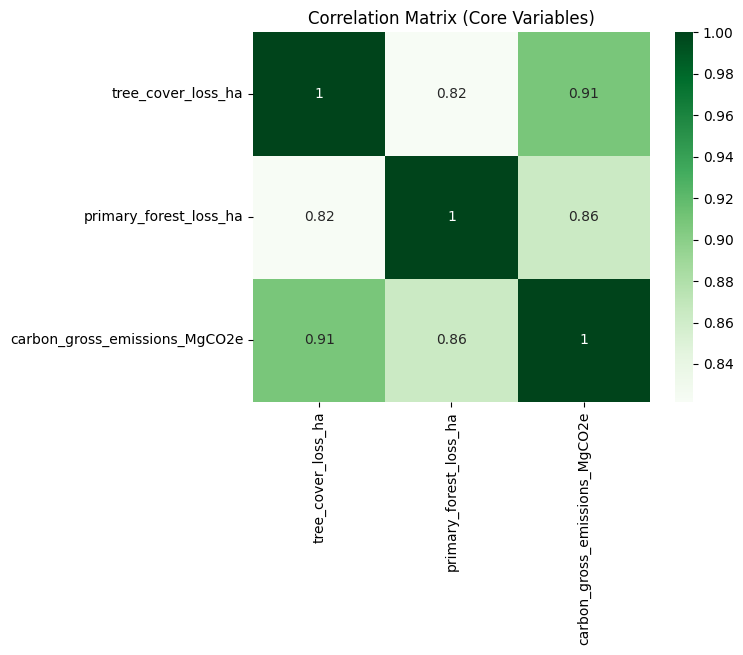

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["tree_cover_loss_ha", "primary_forest_loss_ha",
            "carbon_gross_emissions_MgCO2e"]

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title("Correlation Matrix (Core Variables)")
plt.show()